# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/danielfeldman/anaconda/envs/gaia/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


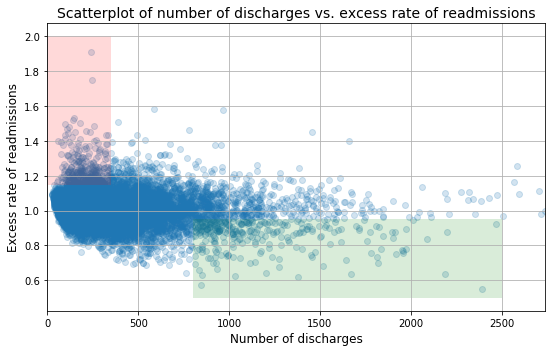

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [5]:
# Your turn
# Let's first look at the data we have:
clean_hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int64
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int64(2), object(5)
memory usage: 1.1+ MB


In [6]:
clean_hospital_read_df.describe()

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,11578.000000,11578.000000,81.0,11497.000000,11497.000000,11497.000000,11497.000000
mean,257681.537226,362.909397,7.0,1.007504,17.984292,17.865695,63.633731
std,154542.645531,309.176945,0.0,0.091964,5.487651,5.240749,59.540296
min,10001.000000,0.000000,7.0,0.549500,2.700000,3.900000,11.000000
25%,110129.750000,157.000000,7.0,0.952600,16.300000,16.600000,24.000000
50%,250040.000000,280.000000,7.0,1.003500,19.000000,19.000000,45.000000
75%,390041.000000,472.750000,7.0,1.058100,21.500000,21.400000,82.000000
max,670082.000000,6793.000000,7.0,1.909500,32.800000,28.000000,879.000000


In [7]:
clean_hospital_read_df.head(6)

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15625,FAIRVIEW DEVELOPMENTAL CENTER,50548,CA,READM-30-HF-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


So it looks like some of the data is still not clean, as the excess readmission rates have some null values (since some hospitals have 0 discharges. Let's clean that up:

In [8]:
clean_hospital_read_df = clean_hospital_read_df.drop(['Footnote'], axis=1)
clean_df = clean_hospital_read_df.dropna()
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11497 entries, 1832 to 13666
Data columns (total 11 columns):
Hospital Name                 11497 non-null object
Provider Number               11497 non-null int64
State                         11497 non-null object
Measure Name                  11497 non-null object
Number of Discharges          11497 non-null int64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11497 non-null object
End Date                      11497 non-null object
dtypes: float64(4), int64(2), object(5)
memory usage: 1.1+ MB


In [9]:
clean_df.describe()

,Provider Number,Number of Discharges,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,11497.000000,11497.000000,11497.000000,11497.000000,11497.000000,11497.000000
mean,257571.540141,365.466209,1.007504,17.984292,17.865695,63.633731
std,154274.374018,308.754590,0.091964,5.487651,5.240749,59.540296
min,10001.000000,25.000000,0.549500,2.700000,3.900000,11.000000
25%,110129.000000,160.000000,0.952600,16.300000,16.600000,24.000000
50%,250042.000000,282.000000,1.003500,19.000000,19.000000,45.000000
75%,390039.000000,474.000000,1.058100,21.500000,21.400000,82.000000
max,670082.000000,6793.000000,1.909500,32.800000,28.000000,879.000000


This is better. With clean data, we can actually take a look at what we are dealing with.

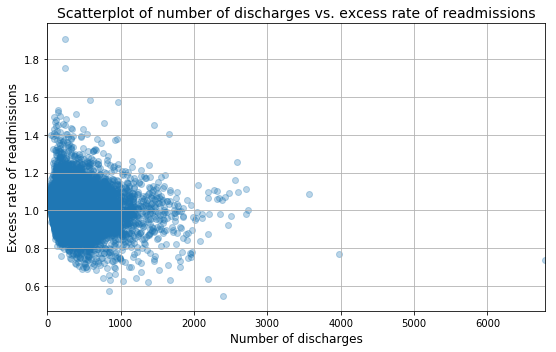

In [10]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_df['Number of Discharges']]
y = list(clean_df['Excess Readmission Ratio'])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y, alpha=0.3)
ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

In [11]:
# Calculate Pearson_R:
r = st.pearsonr(clean_df['Number of Discharges'], clean_df['Excess Readmission Ratio'])
print('Number of Discharges vs Excess Readmission Ratio:\n{}, {}\n'.format(r[0], r[1]))

Number of Discharges vs Excess Readmission Ratio:
-0.09739794351079353, 1.222547377680967e-25



Well, the pearson correlation coefficient between the Number of Discharges and the Excess Readmission Ratio is negatively correlated, which does suggest that smaller hospitals have higher excess readmissions, but the correlation is not very strong, with a value less than -0.1. So already, they overstated the correlation originally found in their summary. But this one measure is not the whole picture.

Their analysis conclusions indicated they are describing the differences between "smaller" vs. "larger hospitals" based on the number of discharges, with no clear definition of where this cutoff distinction is. They report numbers for hospitals with less than 100 discharges, and then greater than 1000.

In [12]:
print(np.percentile(clean_df['Number of Discharges'], 20))
print(np.percentile(clean_df['Number of Discharges'], 80))

138.0
534.0


I'll use the 20th percentile for discharges or less as "small" hosptials. So now we have two populations of hospitals, small and not small. Are the trends clear?

In [13]:
small_df = clean_df.loc[clean_df['Number of Discharges'] <= 138]
large_df = clean_df.loc[clean_df['Number of Discharges'] > 138]

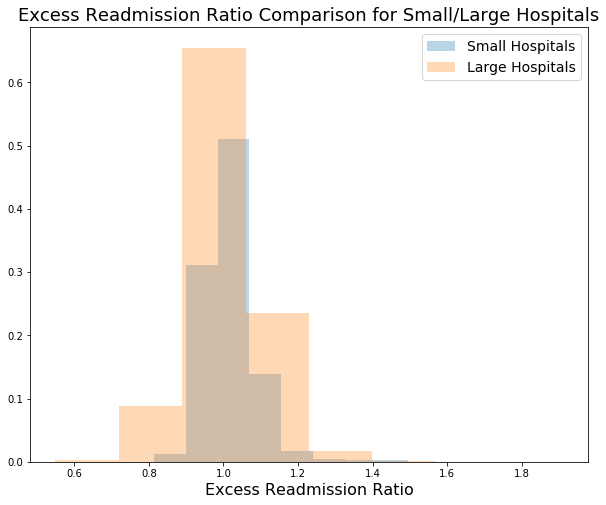

In [14]:
weights_small = np.ones_like(small_df['Excess Readmission Ratio'])/float(len(small_df['Excess Readmission Ratio']))
weights_large = np.ones_like(large_df['Excess Readmission Ratio'])/float(len(large_df['Excess Readmission Ratio']))

fig, axes = plt.subplots(figsize=(10,8))
_ = axes.hist(small_df['Excess Readmission Ratio'], bins=8, label='Small Hospitals', weights=weights_small,
             alpha=0.3)
_ = axes.hist(large_df['Excess Readmission Ratio'], bins=8, label='Large Hospitals', weights=weights_large,
             alpha=0.3)
_ = axes.set_xlabel('Excess Readmission Ratio', fontsize=16)
_ = plt.legend(loc='best', fontsize=14)
_ = plt.title('Excess Readmission Ratio Comparison for Small/Large Hospitals', fontsize=18)
plt.show()

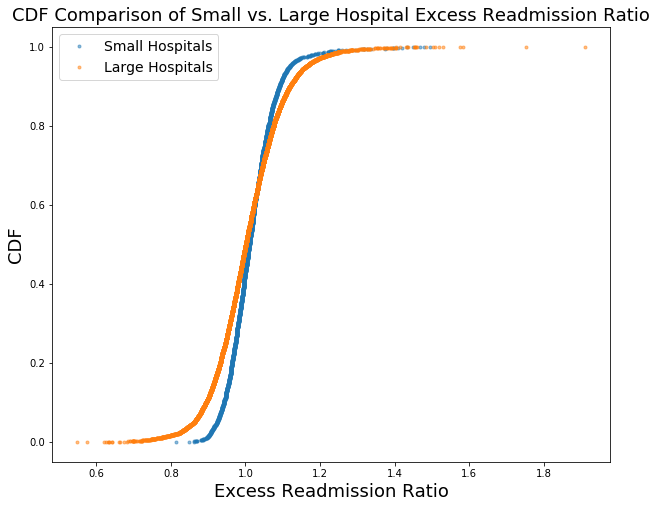

In [15]:
def cdf(data):
    """
    Computes the cumulative distribution function for your data and
    returns the x and y values. Data must be a 1-D array of values.
    
    """
    n_values = len(data)
    
    # Sort the x data, then calculate y:
    x = np.sort(data)
    y = np.arange(1, n_values+1) / n_values
    
    return x, y

# Get CDFs for large and small hospitals:
small_x, small_y = cdf(small_df['Excess Readmission Ratio'])
large_x, large_y = cdf(large_df['Excess Readmission Ratio'])

# Plot it up!
fig, axes = plt.subplots(figsize=(10,8))
_ = axes.plot(small_x, small_y, marker='.', linestyle='none', label='Small Hospitals', alpha=0.5)
_ = axes.plot(large_x, large_y, marker='.', linestyle='none', label='Large Hospitals', alpha=0.5)
_ = axes.legend(loc='best', fontsize=14)
_ = axes.set_xlabel('Excess Readmission Ratio', fontsize=18)
_ = axes.set_ylabel('CDF', fontsize=18)
_ = plt.title('CDF Comparison of Small vs. Large Hospital Excess Readmission Ratio', fontsize=18)
plt.show()

It seems to me that visually it looks like the two distributions look Normally distributed with different standard deviations but similar means, though with the mean for smaller hospitals to be slightly higher than that of the larger ones.

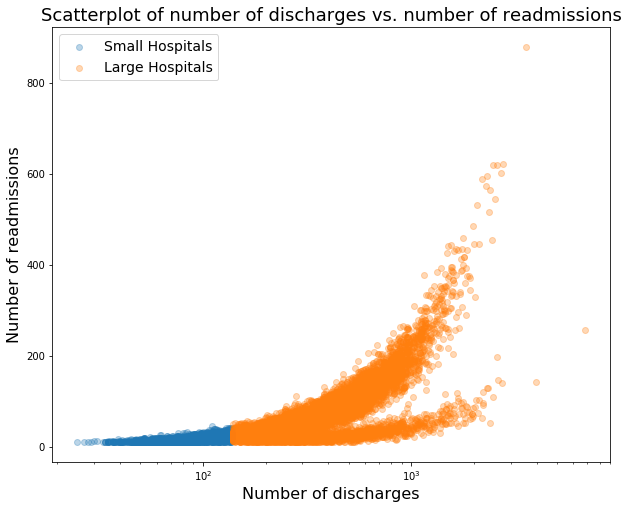

In [16]:
fig, ax = plt.subplots(figsize=(10,8))
_ = ax.scatter(small_df['Number of Discharges'], small_df['Number of Readmissions'], alpha=0.3,
               label='Small Hospitals')
_ = ax.scatter(large_df['Number of Discharges'], large_df['Number of Readmissions'], alpha=0.3, 
               label='Large Hospitals')
_ = ax.set_xlabel('Number of discharges', fontsize=16)
_ = ax.set_ylabel('Number of readmissions', fontsize=16)
_ = ax.set_xscale('log')
_ = ax.set_title('Scatterplot of number of discharges vs. number of readmissions', fontsize=18)
_ = plt.legend(loc='best', fontsize=14)
plt.show()

Here's an interesting tidbit that the initial analysis missed. I wanted to see if the number of discharges tracked well with the number of readmissions. It's clear that there is a trend for small hospitals, but a marked split for larger ones. Some are clearly performing much better than others of the same size, if we assume number of discharges is a good proxy for size (as we have been doing based on the setup of the problem). I will talk about this fact more later. For now, best to focus on the differences between the excess readmissions rates for the small and large hospital populations.

To get a full idea of whether the means are similar, we have to do a statistical test. I think the bootstrapping method would be good to see what the mean differences are. The null hypothesis is that the mean difference between the two distributions is zero (same mean).

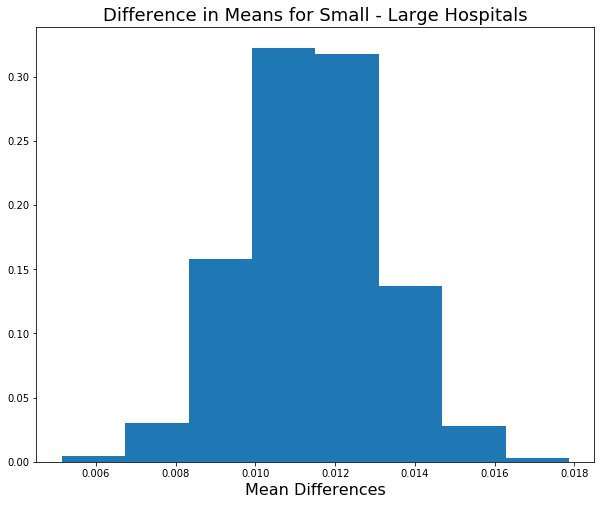

In [17]:
def bootstrap_1d(data, func):
    """
    This will take a 1d array of data and create a bootstrap replicate
    of the supplied statistical function (mean, median, std, etc.).
    
    """
    
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """
    Draw bootstrap replicates of the supplied statistical function.
    Size here is how many total replicates you wish to draw.
    
    """

    # Initialize array of replicates to be filled:
    bs_replicates = np.empty(size)
    
    # Generate all the replicates and store them
    for i in range(size):
        bs_replicates[i] = bootstrap_1d(data, func)
    
    return bs_replicates

# Take bootstrap replicates of both large and small hospital means, and find their difference distribution:
small_bs_reps = draw_bs_reps(small_df['Excess Readmission Ratio'], np.mean, size=10000)
large_bs_reps = draw_bs_reps(large_df['Excess Readmission Ratio'], np.mean, size=10000)
diff_vals = small_bs_reps - large_bs_reps

# Plot the differences:
weights_diff = np.ones_like(diff_vals)/10000.0

fig, axes = plt.subplots(figsize=(10,8))
_ = axes.hist(diff_vals, bins=8, weights=weights_diff)
_ = axes.set_xlabel('Mean Differences', fontsize=16)
_ = plt.title('Difference in Means for Small - Large Hospitals', fontsize=18)
plt.show()

In [18]:
# Calculate the p-value for a mean difference not equal to zero:
mean_diff = np.mean(diff_vals)
unit_distance = mean_diff - 0.0
lower_vals = diff_vals[np.where(diff_vals <= (mean_diff - unit_distance))]
upper_vals = diff_vals[np.where(diff_vals >= (mean_diff + unit_distance))]
p_val = (np.sum(lower_vals) + np.sum(upper_vals)) / len(diff_vals)
print(p_val, len(lower_vals), len(upper_vals))

0.0 0 0


In [19]:
# What is the mean difference range at 99% confidence?
lower_range = np.percentile(diff_vals, 0.05)
upper_range = np.percentile(diff_vals, 99.05)
print(lower_range, upper_range)

0.005765172445782913 0.015564977634711848


The results of the bootstrap test show that the null hypothesis can be rejected very solidly, as the 99th percent confidence level range for mean difference is between 0.005 and 0.016, which are both above zero. As such, there is a mean difference between small hospitals and large ones, with smaller hospitals having a slightly larger excess readmission rate than larger ones. That being said, this difference is clearly very small, with no larger a mean difference than 0.016.

It is very clear from this analysis that there is a difference between the statistical significance and practical significance. It's true that both from the pearson correlation coefficient and the hypothesis test I performed confirmed the initial findings in the study: that smaller hospitals have a higher excess readmission rate than those of smaller hospitals. But the difference between those findings being verified and their recommendations making sense is very large.

Consider first their change of benchmark for small facilities. They look at small hospitals as being fewer than 100 patients and then recommend for smaller than 300. Perhaps they are trying to allow for a margin of error for "small" facilities, but it should be consistent with their tests. Second, and more importantly, they use this analysis to recommend potentially consolidating or closing small hospitals, which is not supported by this analysis. For one, they are only looking at one metric here before considering broader implications of closing small hospitals. Many of these small hospitals are serving areas that have lower populations (like rural America) who may lose complete access to a hospital should the small one nearby close down. If you cannot get to a hospital nearby in an emergency, then mortality rates in the area could skyrocket, and general access to care will become very difficult for less fatal illnesses, leading to a decrease in quality of life. Additionally, these are recommended for cutting costs...but if ER calls from rural areas require longer rides for ambulances to transport patients, then you could get increases in costs that balance the savings. This analysis is way too limited in scope to offer the practical conclusions offered by the initial analysis.

Lastly, I want to return to my earlier plot showing the difference in performance between larger hospitals. There is a clear disparaty between many of the larger hospitals' performances, and this suggests instead a need for larger hospitals to examine why many of them are underperforming others of similar size. That could lead to increased savings without the need to actually close down any hospitals. It also illustrates the simplicity of the initial analysis, hinted at hidden levels of complexity that domain knowledge and additional data will tease out.

As far as the original plot, I think a scatterplot isn't actually a bad way to illustrate some of what it is saying. But I think the CDF comparison I show is better at illustrating the specific point they want to make, which is to show the differences in the performances of large vs. small hospitals. Additionally, their original plot would be improved by a linear regression best-fit line, to show the downward anti-correlation.